In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()

In [37]:
df = pd.read_csv('../../dataset1/time_series_covid19_confirmed_global.csv')
data = df.iloc[:, 4:]
state = df.iloc[:,0]
country = df.iloc[:,1]
last_data = data.iloc[:, -1]

state

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
280    NaN
281    NaN
282    NaN
283    NaN
284    NaN
Name: Province/State, Length: 285, dtype: object

In [38]:
index = 64 # 64 83 145 217 218 255 92
print("选择的国家是：{}".format(country[index]))
print("选择的地区是：{}".format(state[index]))

选择的国家是：China
选择的地区是：Guangdong


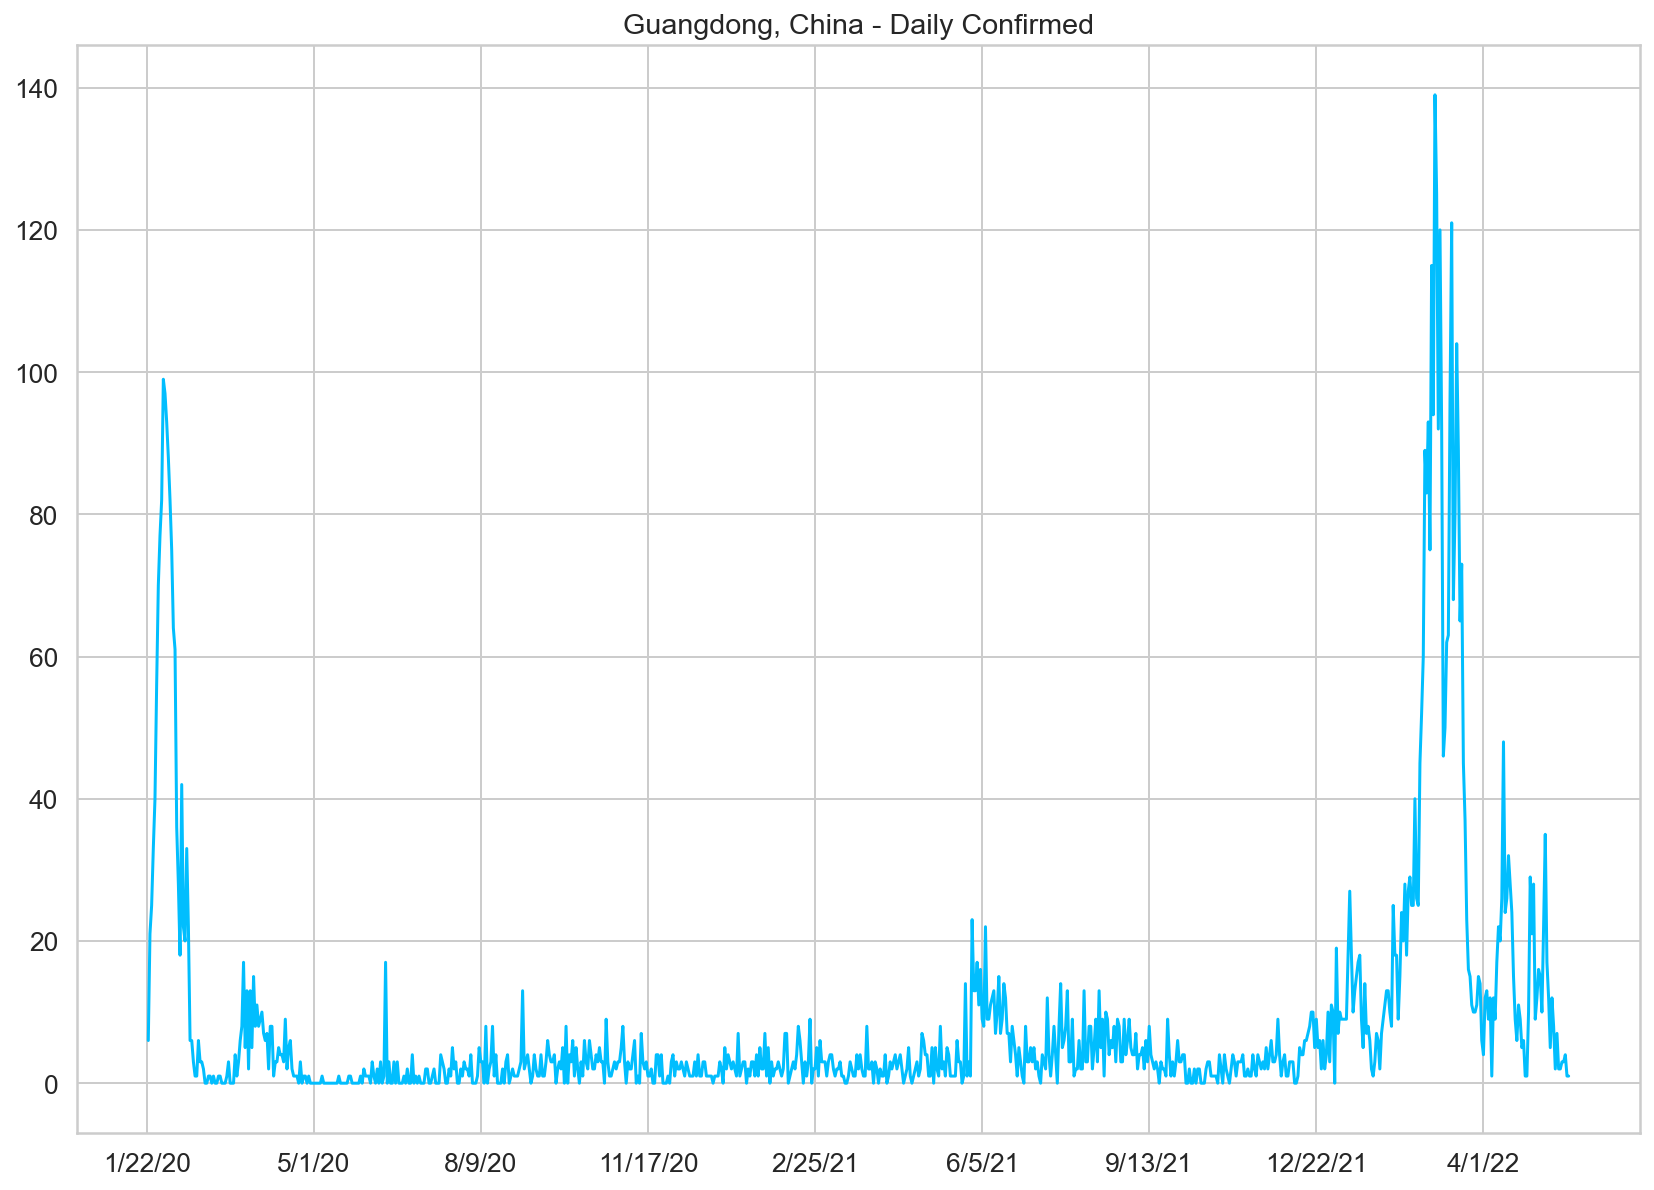

In [39]:
fig, ax = plt.subplots(1,1)
y1 = data.loc[index].diff()
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.plot(y1)
plt.title("{}, {} - Daily Confirmed".format(state.loc[index], country.loc[index]))

plt.show()

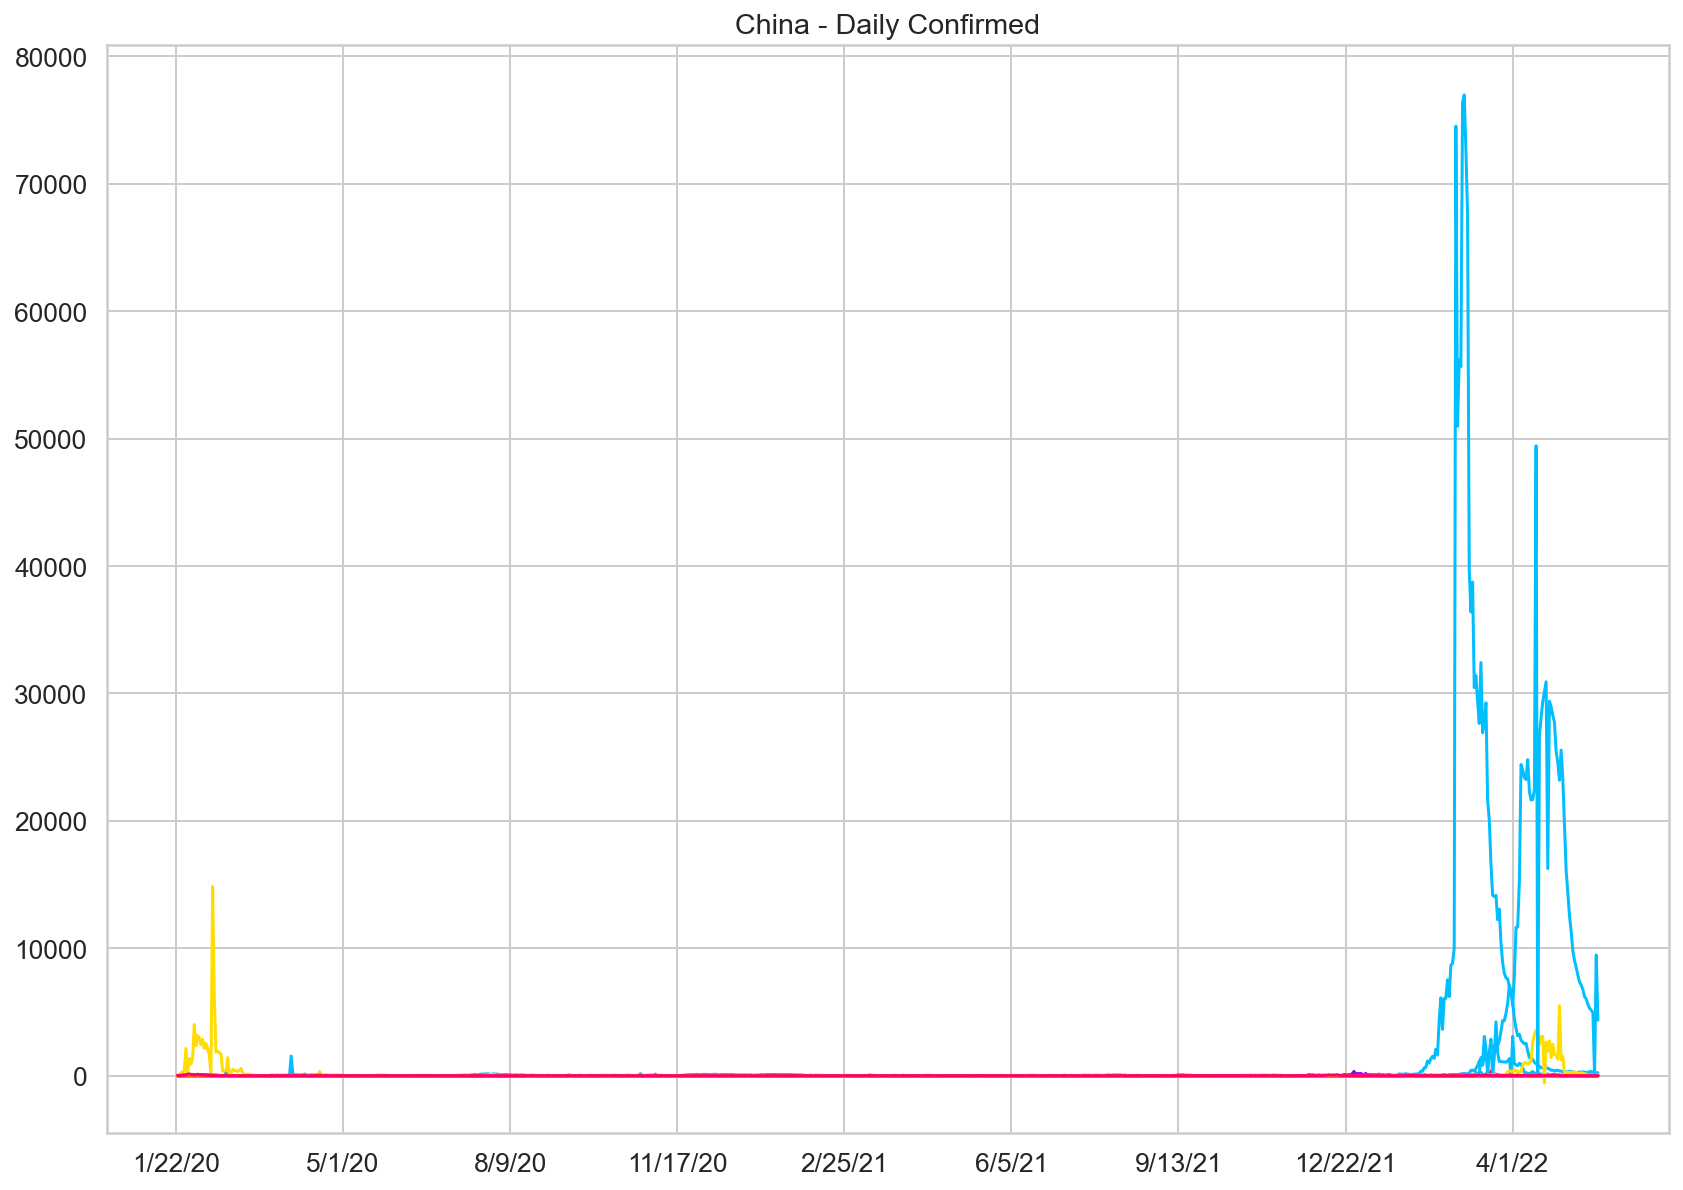

In [40]:
fig, ax = plt.subplots(1,1)
for i in range(59, 93):     # [59,92]
    y1 = data.loc[i].diff()
    plt.plot(y1)
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.title("{} - Daily Confirmed".format(country.loc[index]))

plt.show()

In [41]:
def get_thresholds():
    t = np.array([-1000, -100, -10, 0, 0, 10, 100, 1000])
    t_std = np.std(t)
    t = [x / t_std for x in t]

    return t[5:]

def get_rank(value, thresholds):
    rank = 0
    for t in thresholds:
        if value <= t:
            return rank
        rank += 1
    return rank

thresholds = get_thresholds()
thresholds

[0.019899758692014234, 0.19899758692014233, 1.9899758692014233]

In [42]:
state.loc[59], state.loc[92], state.loc[89], state.loc[71]

('Anhui', 'Zhejiang', 'Unknown', 'Hong Kong')

In [43]:
rows = list(range(59, 71)) + list(range(73, 89)) + list(range(90, 93))
china_data = data.iloc[rows,:].diff(axis=1).iloc[:, 1:]

# 计算所有数据的标准差
temp = pd.concat([d for i, d in china_data.iteritems()])
std = temp.std(ddof=0)

def get_col_rank(col_index):
    d = china_data.loc[:, col_index]
    d = d.apply(lambda x: x / std)
    r = d.apply(lambda x: get_rank(x, thresholds))
    return r

result = pd.DataFrame()
for index, col in china_data.iteritems():
    rank_col = get_col_rank(index)
    result = pd.concat([result, rank_col], axis=1)

result

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,5/13/22,5/14/22,5/15/22,5/16/22,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22
59,1,1,2,2,1,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
60,1,1,1,2,1,1,2,1,2,2,...,2,2,2,2,2,2,2,2,2,2
61,1,1,2,1,2,2,1,2,2,2,...,1,0,0,0,0,0,0,0,0,0
62,1,1,1,1,2,2,1,1,2,2,...,1,1,1,1,1,1,1,1,1,1
63,1,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
64,1,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,0,0
65,1,1,0,1,1,1,1,2,1,1,...,1,0,0,0,0,0,1,1,1,0
66,1,0,0,0,1,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
67,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
68,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [44]:
china_data

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,5/13/22,5/14/22,5/15/22,5/16/22,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22
59,8,6,24,21,10,36,46,48,37,60,...,0,0,0,0,0,0,0,0,0,0
60,8,14,5,27,12,11,20,3,25,29,...,32,33,39,43,52,50,51,58,52,83
61,3,18,30,18,35,22,15,35,29,36,...,2,1,0,0,0,0,0,0,0,0
62,4,5,8,17,24,21,4,17,19,24,...,18,7,7,10,9,7,9,9,7,9
63,2,0,2,3,7,5,5,2,3,11,...,0,0,0,0,0,0,0,0,0,0
64,6,21,25,33,40,56,70,77,82,99,...,8,2,7,2,2,3,3,4,1,1
65,3,18,0,13,10,5,7,20,9,13,...,2,1,0,0,1,0,2,2,2,0
66,2,0,1,1,2,2,0,3,17,0,...,0,2,1,0,0,0,0,0,0,0
67,1,3,11,3,11,7,3,3,6,10,...,0,0,0,0,0,0,0,0,0,0
68,0,1,6,5,5,15,15,17,17,14,...,0,1,0,0,0,0,0,0,0,0


In [45]:
counter = pd.DataFrame()
for index, col in result.iteritems():
    counter = pd.concat([counter, result[index].value_counts()], axis=1)
counter.fillna(value=0)

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,5/13/22,5/14/22,5/15/22,5/16/22,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22
1,18.0,19.0,16.0,17.0,19.0,16.0,13.0,17.0,11.0,12.0,...,8,7.0,5.0,7.0,5.0,6.0,7.0,5.0,5.0,2.0
0,13.0,11.0,9.0,7.0,3.0,4.0,9.0,3.0,6.0,5.0,...,21,22.0,24.0,22.0,23.0,22.0,21.0,23.0,23.0,26.0
2,0.0,1.0,6.0,7.0,9.0,11.0,9.0,11.0,14.0,14.0,...,1,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
result2 = result.reset_index()

for index, row in result2.iterrows():
    result2.iat[index, 0] = state.loc[result2.iat[index, 0]]
result2.to_csv('../../output/risk-rank.csv')